Vui lòng upload file 'Heart Prediction Quantum Dataset.csv'


Saving Heart Prediction Quantum Dataset.csv to Heart Prediction Quantum Dataset (1).csv
Đặc trưng được chọn: ['Age', 'BloodPressure', 'Cholesterol', 'HeartRate', 'QuantumPatternFeature', 'BP_Cholesterol', 'Age_BP']
Kích thước dữ liệu sau chọn đặc trưng: (500, 7)
Phân bố lớp trước SMOTE: {0: 200, 1: 189, 2: 68, 3: 43}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11


Độ chính xác của mô hình Stacking: 0.9875

Báo cáo phân loại:
               precision    recall  f1-score   support

        None       0.98      0.98      0.98       129
        Mild       0.98      0.99      0.99       115
    Moderate       1.00      0.98      0.99       116
      Severe       0.98      1.00      0.99       120

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Cross-Validation Accuracy (mean ± std): 0.9804166666666667 ± 0.016904552312584


<ipython-input-2-f1c101ea6e84>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette='Set2')


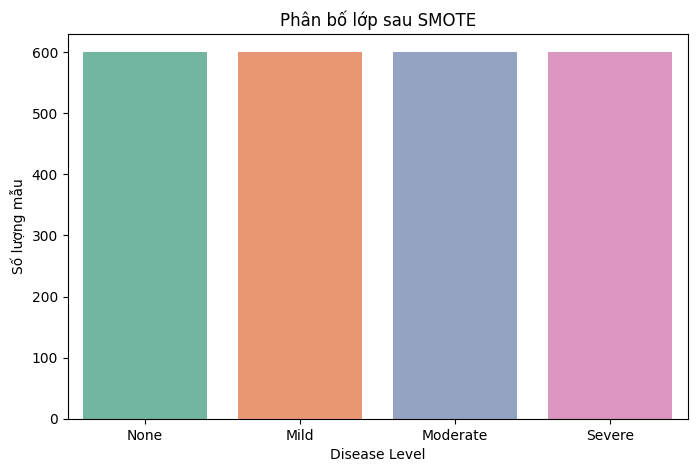

<ipython-input-2-f1c101ea6e84>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_scores, y=selected_features, palette='viridis')


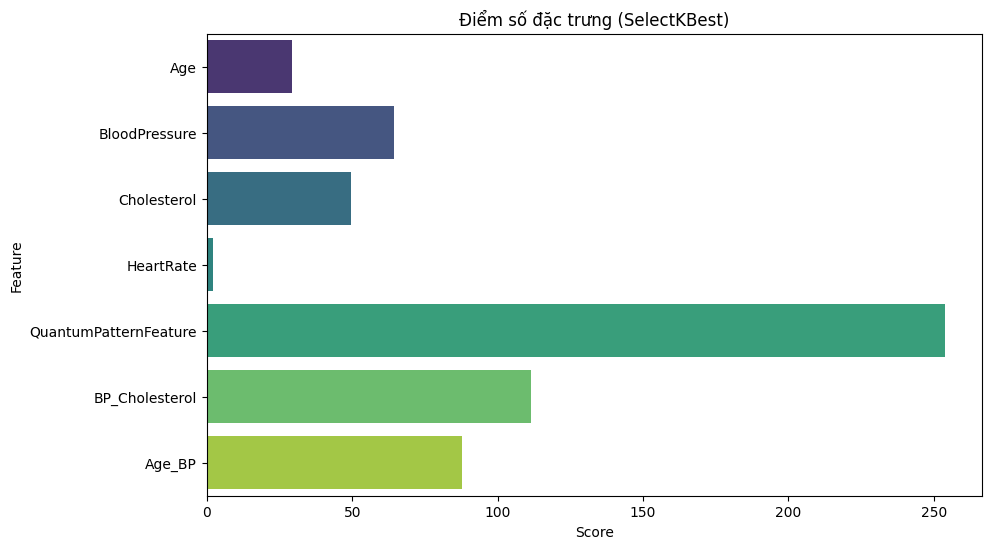

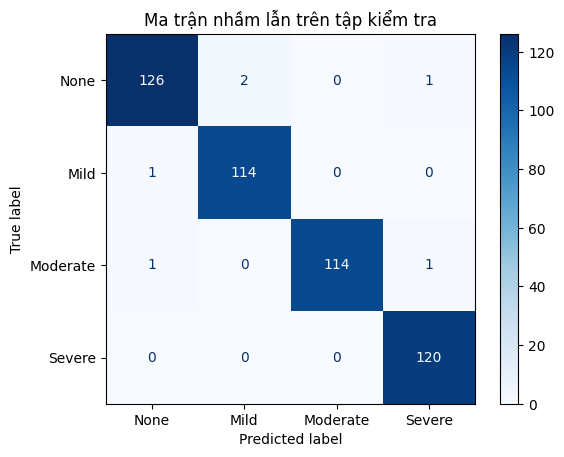

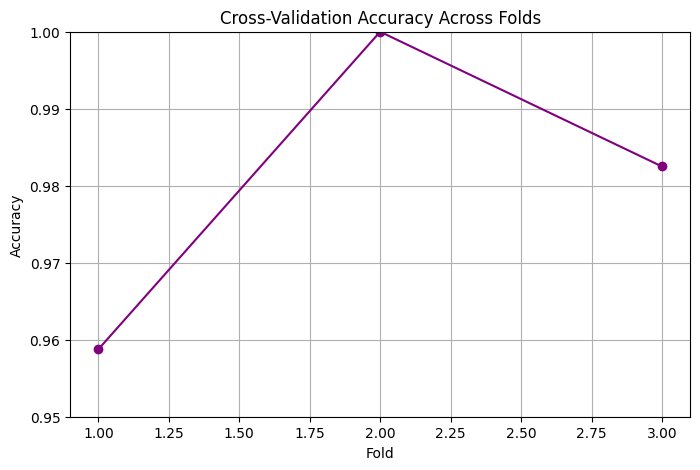


Ghi chú: Đã thêm biểu đồ để minh họa phân bố lớp, điểm số đặc trưng, ma trận nhầm lẫn và độ chính xác cross-validation.


In [ ]:
# Cài đặt các thư viện cần thiết
!pip install lightgbm catboost imbalanced-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from google.colab import files

# Upload file dữ liệu
print("Vui lòng upload file 'Heart Prediction Quantum Dataset.csv'")
uploaded = files.upload()

# Đọc dữ liệu
data = pd.read_csv('/content/Heart Prediction Quantum Dataset.csv')

# Tiền xử lý: Định nghĩa hàm phân mức độ bệnh (DiseaseLevel)
def assign_disease_level(row):
    if row['HeartDisease'] == 0:
        return 0  # Không bệnh
    high_risk_age = 55 if row['Gender'] == 1 else 65  # Nam: 55, Nữ: 65
    risk_factors = 0
    if row['BloodPressure'] >= 160: risk_factors += 2
    elif row['BloodPressure'] >= 140: risk_factors += 1
    if row['Cholesterol'] >= 240: risk_factors += 1
    if row['Age'] >= high_risk_age: risk_factors += 1
    if risk_factors <= 1: return 1  # Nhẹ
    elif risk_factors == 2: return 2  # Trung bình
    else: return 3  # Nặng

# Áp dụng gán nhãn DiseaseLevel
data['DiseaseLevel'] = data.apply(assign_disease_level, axis=1)

# Feature engineering: Tạo đặc trưng tương tác
data['BP_Cholesterol'] = data['BloodPressure'] * data['Cholesterol']
data['Age_BP'] = data['Age'] * data['BloodPressure']

# Tách đặc trưng và nhãn
X = data.drop(['HeartDisease', 'DiseaseLevel'], axis=1)
y = data['DiseaseLevel']

# Chọn đặc trưng quan trọng
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Đặc trưng được chọn:", selected_features)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
print("Kích thước dữ liệu sau chọn đặc trưng:", X_scaled.shape)

# Kiểm tra phân bố lớp trước SMOTE
print("Phân bố lớp trước SMOTE:", pd.Series(y).value_counts().to_dict())

# Cân bằng dữ liệu với SMOTE
target_samples = 600
smote = SMOTE(
    random_state=42,
    sampling_strategy={0: target_samples, 1: target_samples, 2: target_samples, 3: target_samples}
)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Mô hình cơ sở
base_models = [
    ('lgbm', LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42, verbose=-1)),
    ('catboost', CatBoostClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42, verbose=0))
]

# Meta-model
meta_model = LogisticRegression(max_iter=1000, C=10.0)

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Huấn luyện
stacking_clf.fit(X_train, y_train)

# Dự đoán và đánh giá
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nĐộ chính xác của mô hình Stacking: {accuracy:.4f}")
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred, target_names=['None', 'Mild', 'Moderate', 'Severe']))

# Cross-validation
cv_scores = cross_val_score(stacking_clf, X_balanced, y_balanced, cv=3, scoring='accuracy')
print("Cross-Validation Accuracy (mean ± std):", cv_scores.mean(), "±", cv_scores.std())

# --- Vẽ biểu đồ ---

# 1️⃣ Phân bố lớp sau SMOTE
plt.figure(figsize=(8,5))
sns.countplot(x=y_balanced, palette='Set2')
plt.title("Phân bố lớp sau SMOTE")
plt.xlabel("Disease Level")
plt.ylabel("Số lượng mẫu")
plt.xticks(ticks=[0,1,2,3], labels=['None', 'Mild', 'Moderate', 'Severe'])
plt.show()

# 2️⃣ Điểm số đặc trưng
feature_scores = selector.scores_[selector.get_support()]
plt.figure(figsize=(10,6))
sns.barplot(x=feature_scores, y=selected_features, palette='viridis')
plt.title("Điểm số đặc trưng (SelectKBest)")
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

# 3️⃣ Ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['None', 'Mild', 'Moderate', 'Severe'])
disp.plot(cmap='Blues')
plt.title("Ma trận nhầm lẫn trên tập kiểm tra")
plt.show()

# 4️⃣ Cross-Validation Accuracy
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='-', color='purple')
plt.title("Cross-Validation Accuracy Across Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0.95, 1.0)
plt.grid(True)
plt.show()

# Ghi chú kết quả
print("\nGhi chú: Đã thêm biểu đồ để minh họa phân bố lớp, điểm số đặc trưng, ma trận nhầm lẫn và độ chính xác cross-validation.")


File : Lightboot


=== LightGBM Classifier ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Độ chính xác của LightGBM: 0.9812
              precision    recall  f1-score   support

        None       0.98      0.96      0.97       129
        Mild       0.97      0.99      0.98       115
    Moderate       1.00      0.97      0.99       116
      Severe       0.97      1.00      0.98       120

    accuracy                           0.98       480
   macro avg       0.98      0.98      0.98       480
weighted avg       0.98      0.98      0.98       480



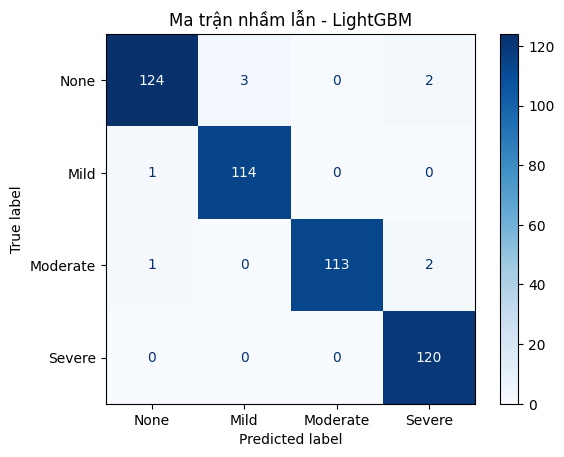

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Cross-Validation Accuracy (LightGBM): 0.9804166666666667 ± 0.018323861189413388


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# lightgbm_model.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Đọc dữ liệu
data = pd.read_csv('Heart Prediction Quantum Dataset.csv')

# Tiền xử lý: Định nghĩa hàm phân mức độ bệnh
def assign_disease_level(row):
    if row['HeartDisease'] == 0:
        return 0
    high_risk_age = 55 if row['Gender'] == 1 else 65
    risk_factors = 0
    if row['BloodPressure'] >= 160: risk_factors += 2
    elif row['BloodPressure'] >= 140: risk_factors += 1
    if row['Cholesterol'] >= 240: risk_factors += 1
    if row['Age'] >= high_risk_age: risk_factors += 1
    if risk_factors <= 1: return 1
    elif risk_factors == 2: return 2
    else: return 3

data['DiseaseLevel'] = data.apply(assign_disease_level, axis=1)
data['BP_Cholesterol'] = data['BloodPressure'] * data['Cholesterol']
data['Age_BP'] = data['Age'] * data['BloodPressure']

X = data.drop(['HeartDisease', 'DiseaseLevel'], axis=1)
y = data['DiseaseLevel']

selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

smote = SMOTE(random_state=42, sampling_strategy={0:600, 1:600, 2:600, 3:600})
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# LightGBM
print("\n=== LightGBM Classifier ===")
lgbm_clf = LGBMClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42, verbose=-1)
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)

accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Độ chính xác của LightGBM: {accuracy_lgbm:.4f}")
print(classification_report(y_test, y_pred_lgbm, target_names=['None', 'Mild', 'Moderate', 'Severe']))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
disp_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=['None', 'Mild', 'Moderate', 'Severe'])
disp_lgbm.plot(cmap='Blues')
plt.title("Ma trận nhầm lẫn - LightGBM")
plt.show()

cv_scores_lgbm = cross_val_score(lgbm_clf, X_balanced, y_balanced, cv=3, scoring='accuracy')
print("Cross-Validation Accuracy (LightGBM):", cv_scores_lgbm.mean(), "±", cv_scores_lgbm.std())


castboot


=== CatBoost Classifier ===
Độ chính xác của CatBoost: 0.9854
              precision    recall  f1-score   support

        None       0.98      0.97      0.98       129
        Mild       0.97      0.99      0.98       115
    Moderate       1.00      0.98      0.99       116
      Severe       0.98      1.00      0.99       120

    accuracy                           0.99       480
   macro avg       0.99      0.99      0.99       480
weighted avg       0.99      0.99      0.99       480



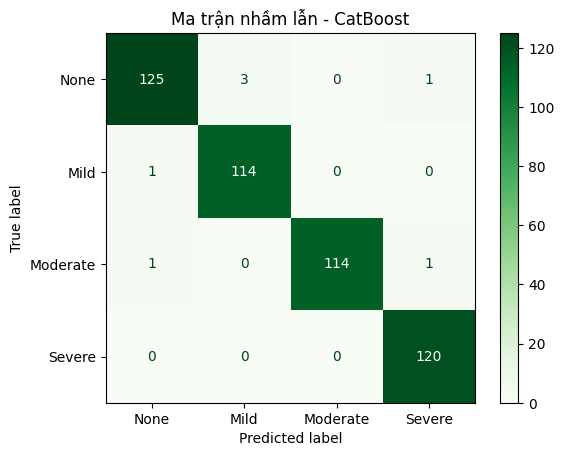

Cross-Validation Accuracy (CatBoost): 0.9816666666666668 ± 0.01480193305694301


In [ ]:
# catboost_model.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Đọc dữ liệu
data = pd.read_csv('Heart Prediction Quantum Dataset.csv')

# Tiền xử lý: Định nghĩa hàm phân mức độ bệnh
def assign_disease_level(row):
    if row['HeartDisease'] == 0:
        return 0
    high_risk_age = 55 if row['Gender'] == 1 else 65
    risk_factors = 0
    if row['BloodPressure'] >= 160: risk_factors += 2
    elif row['BloodPressure'] >= 140: risk_factors += 1
    if row['Cholesterol'] >= 240: risk_factors += 1
    if row['Age'] >= high_risk_age: risk_factors += 1
    if risk_factors <= 1: return 1
    elif risk_factors == 2: return 2
    else: return 3

data['DiseaseLevel'] = data.apply(assign_disease_level, axis=1)
data['BP_Cholesterol'] = data['BloodPressure'] * data['Cholesterol']
data['Age_BP'] = data['Age'] * data['BloodPressure']

X = data.drop(['HeartDisease', 'DiseaseLevel'], axis=1)
y = data['DiseaseLevel']

selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

smote = SMOTE(random_state=42, sampling_strategy={0:600, 1:600, 2:600, 3:600})
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# CatBoost
print("\n=== CatBoost Classifier ===")
catboost_clf = CatBoostClassifier(n_estimators=300, max_depth=7, learning_rate=0.1, random_state=42, verbose=0)
catboost_clf.fit(X_train, y_train)
y_pred_cat = catboost_clf.predict(X_test)

accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"Độ chính xác của CatBoost: {accuracy_cat:.4f}")
print(classification_report(y_test, y_pred_cat, target_names=['None', 'Mild', 'Moderate', 'Severe']))

cm_cat = confusion_matrix(y_test, y_pred_cat)
disp_cat = ConfusionMatrixDisplay(confusion_matrix=cm_cat, display_labels=['None', 'Mild', 'Moderate', 'Severe'])
disp_cat.plot(cmap='Greens')
plt.title("Ma trận nhầm lẫn - CatBoost")
plt.show()

cv_scores_cat = cross_val_score(catboost_clf, X_balanced, y_balanced, cv=3, scoring='accuracy')
print("Cross-Validation Accuracy (CatBoost):", cv_scores_cat.mean(), "±", cv_scores_cat.std())
